In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`Loading the dataset and making the model from it`

In [65]:
df = pd.read_csv('data.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


`Checking for the null values`

In [66]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

#### There are no nulls hence we can give the data to algorithm
#### But before giving the data we need to develop generalized and follow some steps
#### So we can use the techniques called train_test_split concept

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [68]:
### Since we are working in simple linear regression we are having x and y [x - independent and y - dependent]

In [69]:
import sklearn

In [70]:
## Spliting the data

from sklearn.model_selection import train_test_split

In [71]:
## Giving independent data to X and dependent data to Y

x = df['Height']  # independent
y = df['Weight']  # dependent

In [72]:
x.shape, y.shape

((15,), (15,))

In [73]:
x.ndim

1

In [74]:
len(x),len(y)

(15, 15)

In [75]:
x = x.values.reshape(-1,1)

In [76]:
x.shape

(15, 1)

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=None)

In [78]:
# Since previously it was in 1d dataframe now x is 2d so dataframe will work only for 1d
# convert 2d to 1d temporarily


In [99]:
x_train.shape

(12, 1)

In [100]:
# To convert 2d - 1d we use flatten()
# x_train.flatten()

In [101]:
training_data = pd.DataFrame({'x_train':x_train.flatten(),'y_train':y_train})

In [102]:
training_data

,x_train,y_train
9,1.70,64.47
2,1.52,54.48
14,1.83,74.46
4,1.57,57.20
8,1.68,63.11
0,1.47,52.21
1,1.50,53.12
10,1.73,66.28
7,1.65,61.29
13,1.80,72.19


In [103]:
test_data=pd.DataFrame({'x_test':x_test.flatten(),'y_test':y_test})

In [84]:
test_data

,x_test,y_test
7,1.65,61.29
14,1.83,74.46
2,1.52,54.48


In [85]:
len(x_train)

12

In [87]:
len(x_test)

3

In [88]:
# Now I'm using the this training data to train the algorithm

# y = mx + c

In [104]:
from sklearn.linear_model import LinearRegression

# importing the algorithm

In [105]:
reg = LinearRegression()

In [107]:
# now reg is y = mx + c

# Now giving the data to th algorithm

reg.fit(x_train,y_train)

LinearRegression()

In [94]:
# Algorithm learned from the data

# y = mx + c

In [108]:
# m = value

reg.coef_

array([60.88240575])

In [109]:
# C = value

reg.intercept_

-38.300038898862965

In [110]:
# We just trained the model but we need to also check whether it trained properly or not

In [111]:
#### now we will see how the training data looks like

### I'm using x_train and y_train for graphical representation to check how they are internally related

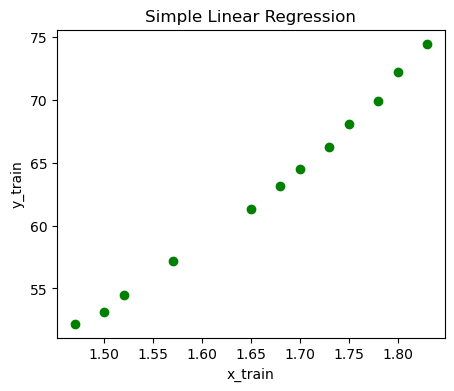

In [112]:
plt.figure(figsize=(5,4))
plt.scatter(x = x_train, y=y_train,color = 'g')
plt.title('Simple Linear Regression')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

#### Since x points increasing y is increasing we can say it is a positive variance

In [113]:
# y = mx + c

# y = 60.88240575 * x + -38.30003889886296 [model]

In [115]:
training_data.head()

,x_train,y_train
9,1.70,64.47
2,1.52,54.48
14,1.83,74.46
4,1.57,57.20
8,1.68,63.11


In [117]:
60.88240575 * 3.3 + -38.30003889886296

162.611900076137

In [119]:
y_train_prediction = reg.predict(x_train)
print(y_train_prediction)

[65.20005087 54.24121783 73.11476361 57.28533812 63.98240275 51.19709755
 53.02356972 67.02652304 62.15593058 71.28829144 68.24417115 70.07064333]


In [121]:
training_data['y_train_prediction'] = y_train_prediction

In [123]:
training_data

,x_train,y_train,y_train_prediction
9,1.70,64.47,65.200051
2,1.52,54.48,54.241218
14,1.83,74.46,73.114764
4,1.57,57.20,57.285338
8,1.68,63.11,63.982403
0,1.47,52.21,51.197098
1,1.50,53.12,53.023570
10,1.73,66.28,67.026523
7,1.65,61.29,62.155931
13,1.80,72.19,71.288291


In [124]:
## Not only actual data will represent graphical presentation also prediction will also

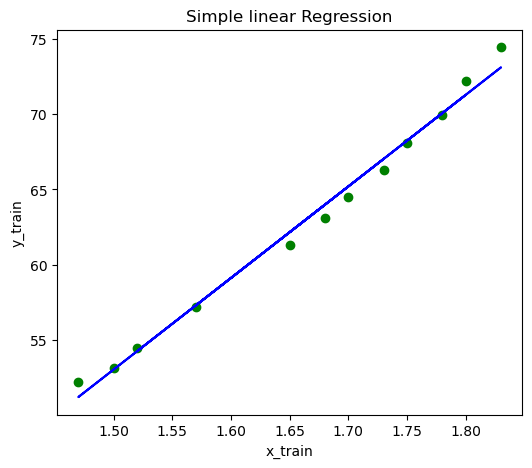

In [125]:
plt.figure(figsize=(6,5))
plt.scatter(x = x_train, y = y_train, color = 'g')
plt.plot(x_train, y_train_prediction, color = 'b')
plt.title('Simple linear Regression')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()


In [128]:
#then find the training loss

from sklearn.metrics import r2_score # is used to find the accuracy of the model

In [131]:
print(f'the model tarining accuracy : {r2_score(y_train, y_train_prediction)}')

the model tarining accuracy : 0.9898250581991014


In [133]:
print(f'training loss will be:{1-r2_score(y_train,y_train_prediction)}')

training loss will be:0.010174941800898618


In [134]:
0.9898250581991014 + 0.010174941800898618

1.0

### Now work with the test data : [here will get how our model is]

In [144]:
y_test_prediction = reg.predict(x_test)
print(y_test_prediction)

[59.11181029 60.93828247 56.06769001]


In [145]:
test_data['y_test_prediction'] = y_test_prediction

In [147]:
test_data

,x_test,y_test,y_test_prediction
5,1.60,58.57,59.111810
6,1.63,59.93,60.938282
3,1.55,55.84,56.067690


In [140]:
## Finding test accuracy

print(f'the test accuracy : {r2_score(y_test,y_test_prediction)}')

 the test accuracy : 0.8430268995222719


In [142]:
## Finding of loss of the accuracy


print(f'The loss test accuracy : {1 - r2_score(y_test,y_test_prediction)}')

The loss test accuracy : 0.15697310047772806


In [143]:
0.8430268995222719 + 0.15697310047772806

1.0

In [148]:
reg.predict([[3.3]])

array([162.61190006])